# Digital Marketing Campaign Conversion Prediction

# A. Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import random  # Ensure random module is imported

Color_Palette = ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]

# Function to shuffle palette randomly
def Random_Color_Palette():
    shuffled = random.sample(Color_Palette, len(Color_Palette))
    sns.set_palette(shuffled)
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=shuffled)

# Now you can call this function in any cell after defining it


# B. Data Preprocessing

In [6]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv') #importing File in for analysis) #importing File in for analysis

In [7]:
df

CustomerID  Age  Gender  Income CampaignChannel   CampaignType  \
0           8000   56  Female  136912    Social Media      Awareness   
1           8001   69    Male   41760           Email      Retention   
2           8002   46  Female   88456             PPC      Awareness   
3           8003   32  Female   44085             PPC     Conversion   
4           8004   60  Female   83964             PPC     Conversion   
...          ...  ...     ...     ...             ...            ...   
7995       15995   21    Male   24849           Email      Awareness   
7996       15996   43  Female   44718             SEO      Retention   
7997       15997   28  Female  125471        Referral  Consideration   
7998       15998   19  Female  107862             PPC  Consideration   
7999       15999   31  Female   93002           Email      Awareness   

          AdSpend  ClickThroughRate  ConversionRate  WebsiteVisits  \
0     6497.870068          0.043919        0.088031              0   
1     3898.668606          0.155725        0.182725             42   
2     1546.429596          0.277490        0.076423              2   
3      539.525936          0.137611        0.088004             47   
4     1678.043573          0.252851        0.109940              0   
...           ...               ...             ...            ...   
7995  8518.308575          0.243792        0.116773             23   
7996  1424.613446          0.236740        0.190061             49   
7997  4609.534635          0.056526        0.133826             35   
7998  9476.106354          0.023961        0.138386             49   
7999  7743.627070          0.185670        0.057228             15   

      PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  EmailClicks  \
0          2.399017    7.396803            19           6            9   
1          2.917138    5.352549             5           2            7   
2          8.223619   13.794901             0          11            2   
3          4.540939   14.688363            89           2            2   
4          2.046847   13.993370             6           6            6   
...             ...         ...           ...         ...          ...   
7995       9.693602   14.227794            70          13            6   
7996       9.499010    3.501106            52          13            1   
7997       2.853241   14.618323            38          16            0   
7998       1.002964    3.876623            86           1            5   
7999       6.964739   12.763660             2          18            9   

      PreviousPurchases  LoyaltyPoints AdvertisingPlatform AdvertisingTool  \
0                     4            688            IsConfid      ToolConfid   
1                     2           3459            IsConfid      ToolConfid   
2                     8           2337            IsConfid      ToolConfid   
3                     0           2463            IsConfid      ToolConfid   
4                     8           4345            IsConfid      ToolConfid   
...                 ...            ...                 ...             ...   
7995                  7            286            IsConfid      ToolConfid   
7996                  5           1502            IsConfid      ToolConfid   
7997                  3            738            IsConfid      ToolConfid   
7998                  7           2709            IsConfid      ToolConfid   
7999                  9            341            IsConfid      ToolConfid   

      Conversion  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
7995           0  
7996           0  
7997           1  
7998           1  
7999           0  

[8000 rows x 20 columns]

In [8]:
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

In [9]:
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [11]:
df.shape

(8000, 20)

In [12]:
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [13]:
#Removing Unnecessary Columns
df = df.drop(columns = ['CustomerID', 'AdvertisingPlatform','AdvertisingTool'],axis=1)

In [14]:
df.columns

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints', 'Conversion'],
      dtype='object')

In [15]:
df['AdSpend'].describe()

count    8000.000000
mean     5000.944830
std      2838.038153
min       100.054813
25%      2523.221165
50%      5013.440044
75%      7407.989369
max      9997.914781
Name: AdSpend, dtype: float64

# C. Exploratory Data Analysis (EDA)

In [17]:
#collor Palette
CP = ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]

## 1. Uni-varied Analysis

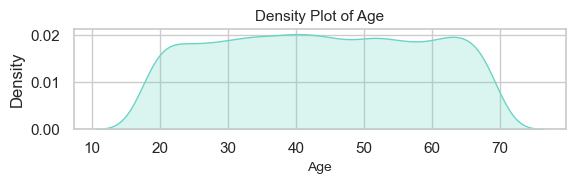

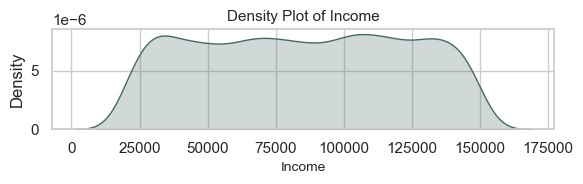

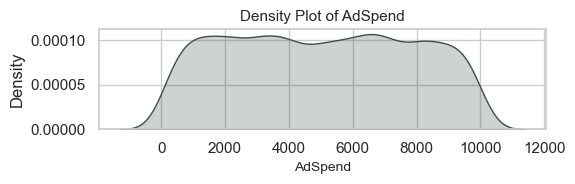

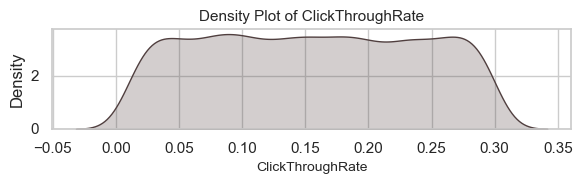

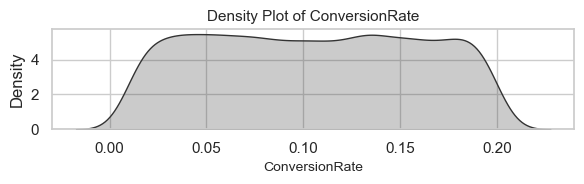

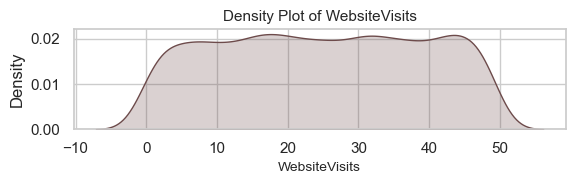

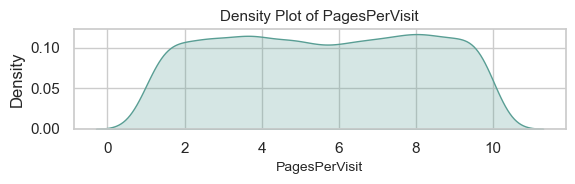

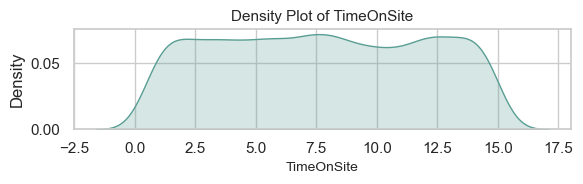

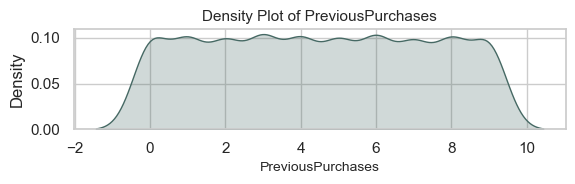

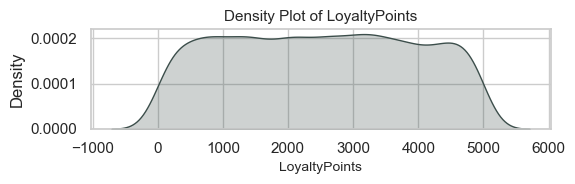

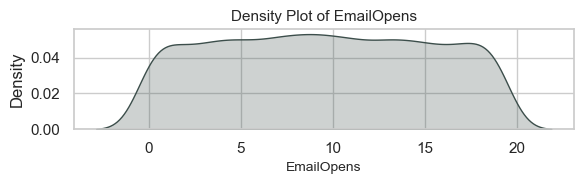

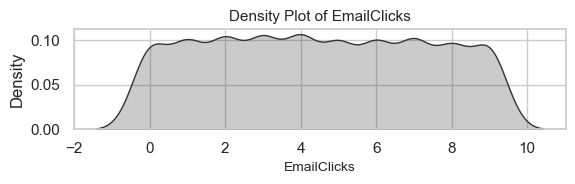

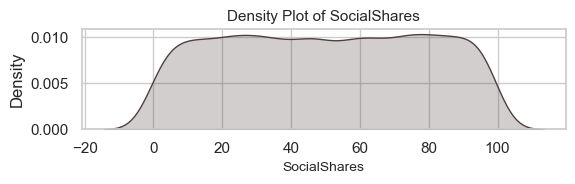

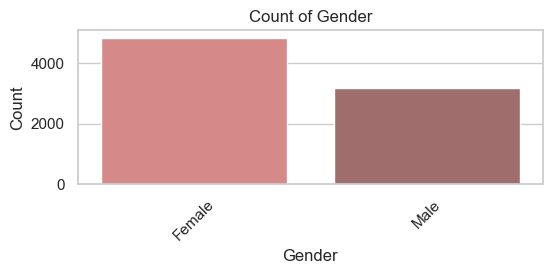

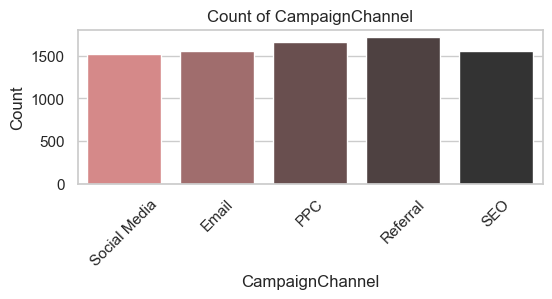

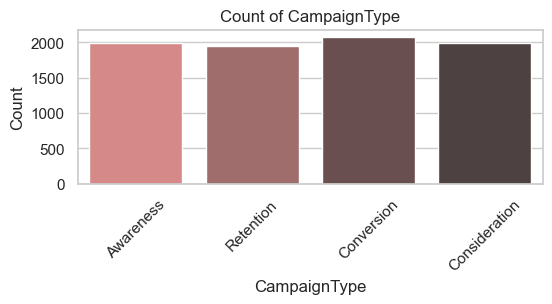

<Figure size 600x200 with 0 Axes>

In [19]:
# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 2)

Random_Color_Palette()

# Define important columns
numeric_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'PreviousPurchases',
                'LoyaltyPoints', 'EmailOpens', 'EmailClicks', 'SocialShares']

categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType']
# --- Numeric Features ---
for col in numeric_cols:
    plt.figure()
    sns.kdeplot(data=df, x=col, fill=True, color=random.choice(Color_Palette))
    plt.title(f'Density Plot of {col}', fontsize=11)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


# --- Categorical Features ---
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=df, palette=Color_Palette)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plt.savefig('UniVarieted Distributions.png')  


### Univariate for Target 

<Axes: xlabel='Conversion'>

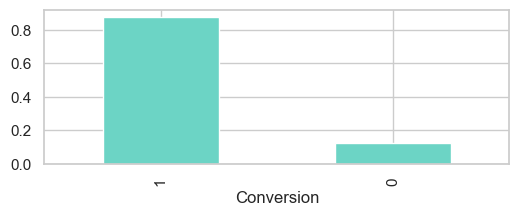

In [21]:
Random_Color_Palette()
df['Conversion'].value_counts(normalize='index').plot(kind = 'bar')

## 2. Bi-varied Analysis

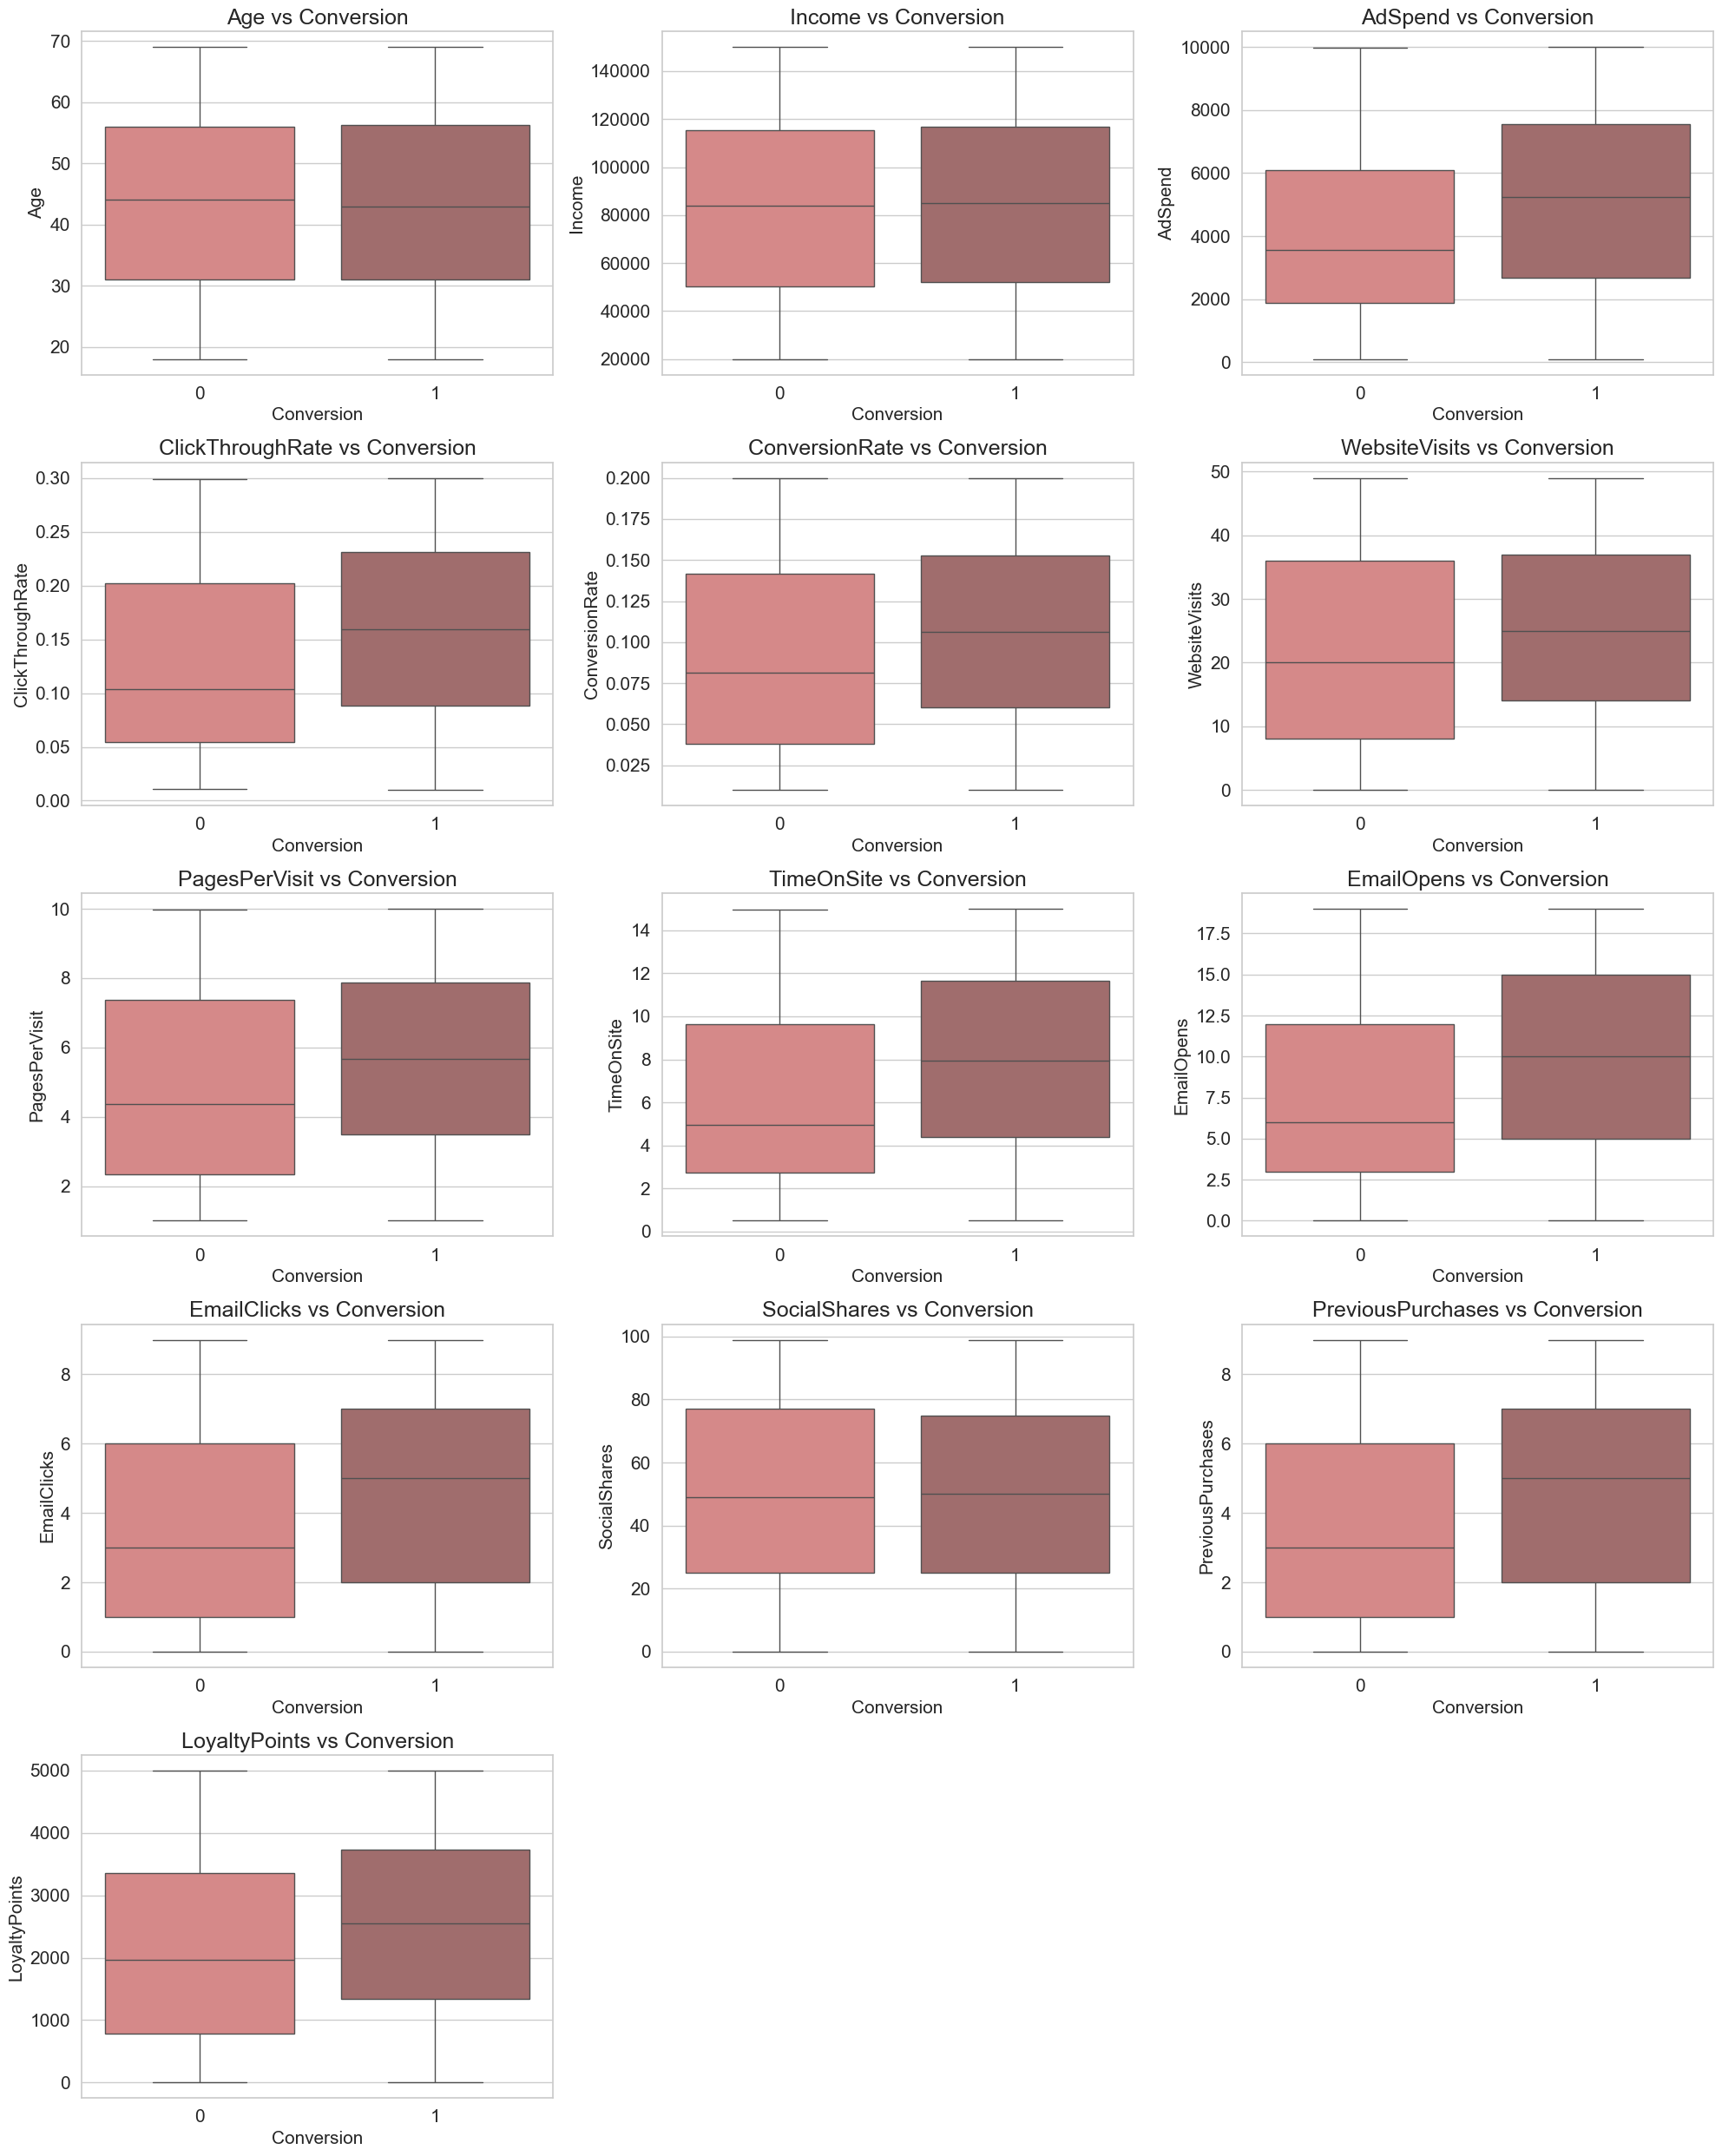

In [23]:
Random_Color_Palette()

# List of numerical features (excluding target)
numerical_cols = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                  'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens',
                  'EmailClicks', 'SocialShares', 'PreviousPurchases', 'LoyaltyPoints']

# Plot setup
n = len(numerical_cols)
cols = 3
rows = -(-n // cols)  # Ceiling division
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Conversion', y=col, ax=axes[i], palette=CP)
    axes[i].set_title(f'{col} vs Conversion', fontsize=18)
    axes[i].set_xlabel('Conversion', fontsize=15)
    axes[i].set_ylabel(col, fontsize=15)
    axes[i].tick_params(axis='both', labelsize=15)

# Remove extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### BiVariate for Catogorical Data

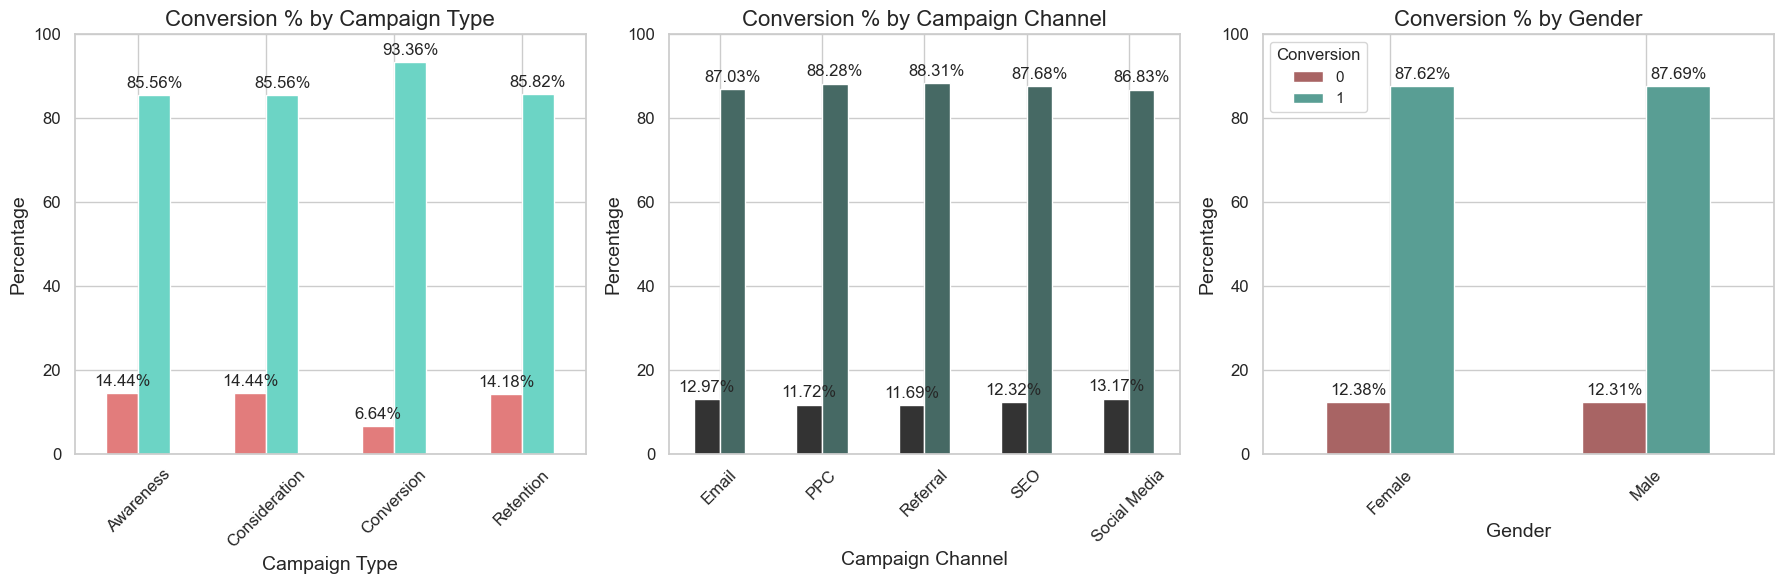

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

categories = {
    "Campaign Type": ('CampaignType'),
    "Campaign Channel": ('CampaignChannel'),
    "Gender": ('Gender')
}

for ax, (title, (col)) in zip(axes, categories.items()):
    crosstab = pd.crosstab(df[col], df['Conversion'], normalize='index') * 100
    bars = crosstab.plot(kind='bar', ax=ax, color=Random_Color_Palette(), legend=(title == "Gender"))
    
    ax.set_title(f"Conversion % by {title}", fontsize=16)
    ax.set_ylabel("Percentage", fontsize=14)
    ax.set_xlabel(title, fontsize=14)
    
    ax.set_ylim(0, 100)
    ax.set_yticks(range(0, 101, 20))
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # rotate x-axis labels if needed

    for container in bars.containers:
        bars.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize=12)

plt.tight_layout()
plt.show()


## Multivaried Analysis

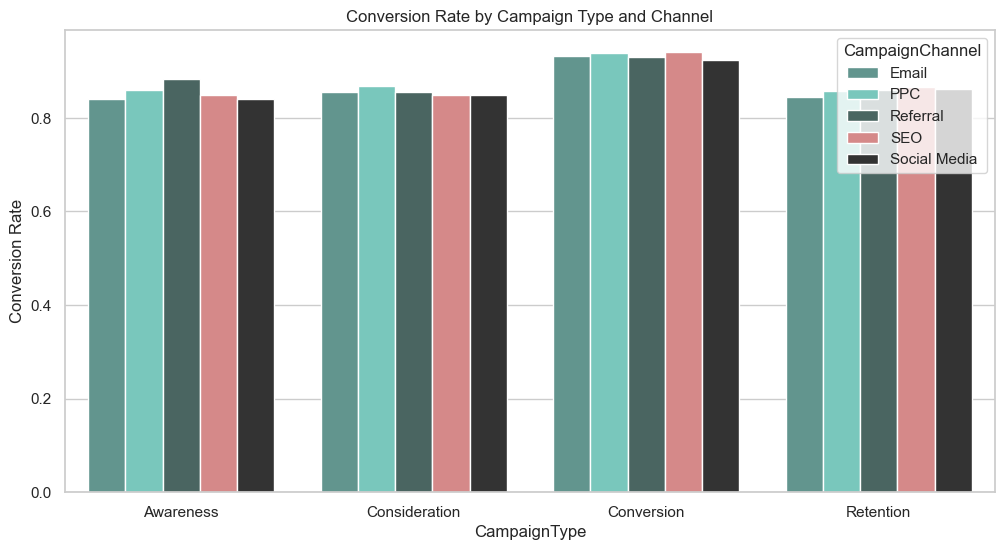

In [27]:
conversion_group = df.groupby(['CampaignType', 'CampaignChannel'])['Conversion'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_group, x='CampaignType', y='Conversion', hue='CampaignChannel', palette=Random_Color_Palette())
plt.title("Conversion Rate by Campaign Type and Channel")
plt.ylabel("Conversion Rate")
plt.show()

# D. Outlier Analysis

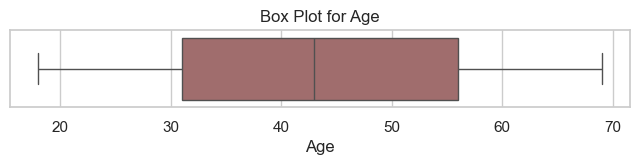

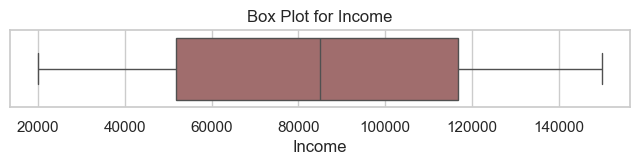

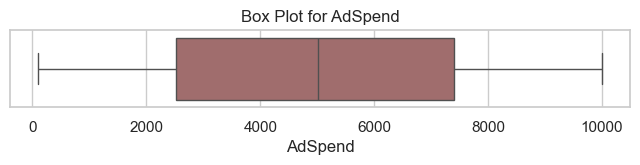

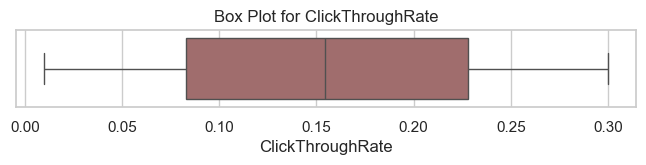

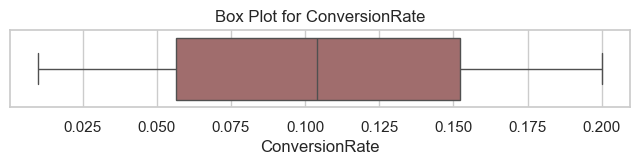

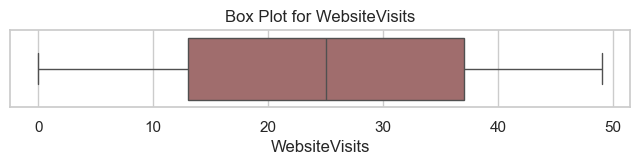

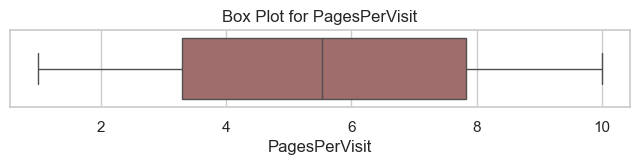

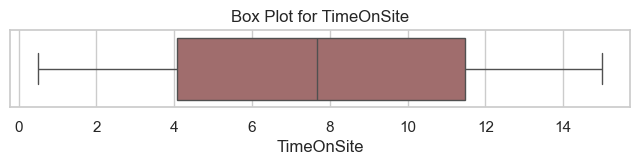

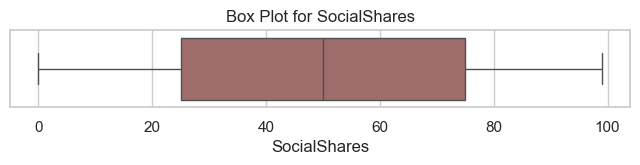

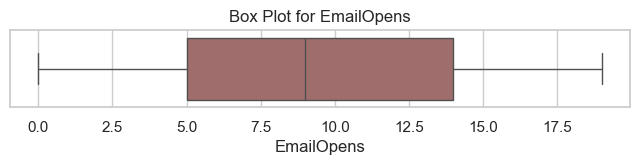

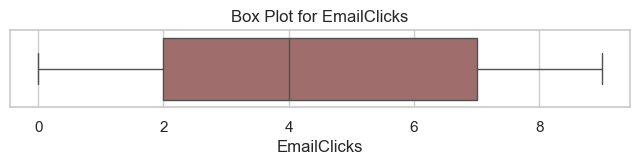

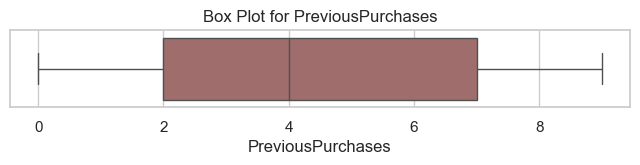

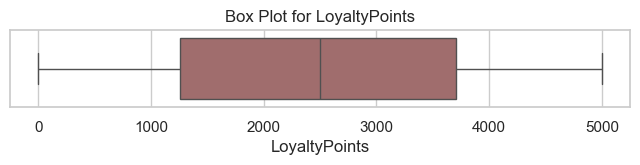

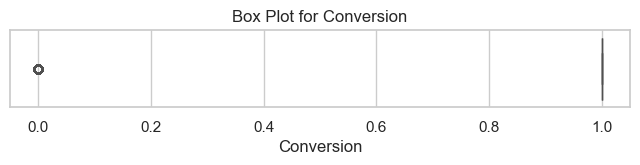

In [29]:
Random_Color_Palette()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [30]:
from sklearn.covariance import EllipticEnvelope

In [31]:
EE = EllipticEnvelope(contamination = 0.005)
df['Outlier_Flag'] = EE.fit_predict(df[['Income','AdSpend','ClickThroughRate','ConversionRate','WebsiteVisits','PagesPerVisit','TimeOnSite','SocialShares','EmailOpens','EmailClicks','PreviousPurchases','LoyaltyPoints']])

In [32]:
df.head()

Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0   56  Female  136912    Social Media    Awareness  6497.870068   
1   69    Male   41760           Email    Retention  3898.668606   
2   46  Female   88456             PPC    Awareness  1546.429596   
3   32  Female   44085             PPC   Conversion   539.525936   
4   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

   Conversion  Outlier_Flag  
0           1             1  
1           1             1  
2           1             1  
3           1             1  
4           1             1

In [33]:
df = df[df['Outlier_Flag']==1]

In [34]:
df

Age  Gender  Income CampaignChannel   CampaignType      AdSpend  \
0      56  Female  136912    Social Media      Awareness  6497.870068   
1      69    Male   41760           Email      Retention  3898.668606   
2      46  Female   88456             PPC      Awareness  1546.429596   
3      32  Female   44085             PPC     Conversion   539.525936   
4      60  Female   83964             PPC     Conversion  1678.043573   
...   ...     ...     ...             ...            ...          ...   
7995   21    Male   24849           Email      Awareness  8518.308575   
7996   43  Female   44718             SEO      Retention  1424.613446   
7997   28  Female  125471        Referral  Consideration  4609.534635   
7998   19  Female  107862             PPC  Consideration  9476.106354   
7999   31  Female   93002           Email      Awareness  7743.627070   

      ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
0             0.043919        0.088031              0       2.399017   
1             0.155725        0.182725             42       2.917138   
2             0.277490        0.076423              2       8.223619   
3             0.137611        0.088004             47       4.540939   
4             0.252851        0.109940              0       2.046847   
...                ...             ...            ...            ...   
7995          0.243792        0.116773             23       9.693602   
7996          0.236740        0.190061             49       9.499010   
7997          0.056526        0.133826             35       2.853241   
7998          0.023961        0.138386             49       1.002964   
7999          0.185670        0.057228             15       6.964739   

      TimeOnSite  SocialShares  EmailOpens  EmailClicks  PreviousPurchases  \
0       7.396803            19           6            9                  4   
1       5.352549             5           2            7                  2   
2      13.794901             0          11            2                  8   
3      14.688363            89           2            2                  0   
4      13.993370             6           6            6                  8   
...          ...           ...         ...          ...                ...   
7995   14.227794            70          13            6                  7   
7996    3.501106            52          13            1                  5   
7997   14.618323            38          16            0                  3   
7998    3.876623            86           1            5                  7   
7999   12.763660             2          18            9                  9   

      LoyaltyPoints  Conversion  Outlier_Flag  
0               688           1             1  
1              3459           1             1  
2              2337           1             1  
3              2463           1             1  
4              4345           1             1  
...             ...         ...           ...  
7995            286           0             1  
7996           1502           0             1  
7997            738           1             1  
7998           2709           1             1  
7999            341           0             1  

[7960 rows x 18 columns]

In [35]:
df.reset_index(drop = True,inplace=True)

In [36]:
del df['Outlier_Flag']
df

Age  Gender  Income CampaignChannel   CampaignType      AdSpend  \
0      56  Female  136912    Social Media      Awareness  6497.870068   
1      69    Male   41760           Email      Retention  3898.668606   
2      46  Female   88456             PPC      Awareness  1546.429596   
3      32  Female   44085             PPC     Conversion   539.525936   
4      60  Female   83964             PPC     Conversion  1678.043573   
...   ...     ...     ...             ...            ...          ...   
7955   21    Male   24849           Email      Awareness  8518.308575   
7956   43  Female   44718             SEO      Retention  1424.613446   
7957   28  Female  125471        Referral  Consideration  4609.534635   
7958   19  Female  107862             PPC  Consideration  9476.106354   
7959   31  Female   93002           Email      Awareness  7743.627070   

      ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
0             0.043919        0.088031              0       2.399017   
1             0.155725        0.182725             42       2.917138   
2             0.277490        0.076423              2       8.223619   
3             0.137611        0.088004             47       4.540939   
4             0.252851        0.109940              0       2.046847   
...                ...             ...            ...            ...   
7955          0.243792        0.116773             23       9.693602   
7956          0.236740        0.190061             49       9.499010   
7957          0.056526        0.133826             35       2.853241   
7958          0.023961        0.138386             49       1.002964   
7959          0.185670        0.057228             15       6.964739   

      TimeOnSite  SocialShares  EmailOpens  EmailClicks  PreviousPurchases  \
0       7.396803            19           6            9                  4   
1       5.352549             5           2            7                  2   
2      13.794901             0          11            2                  8   
3      14.688363            89           2            2                  0   
4      13.993370             6           6            6                  8   
...          ...           ...         ...          ...                ...   
7955   14.227794            70          13            6                  7   
7956    3.501106            52          13            1                  5   
7957   14.618323            38          16            0                  3   
7958    3.876623            86           1            5                  7   
7959   12.763660             2          18            9                  9   

      LoyaltyPoints  Conversion  
0               688           1  
1              3459           1  
2              2337           1  
3              2463           1  
4              4345           1  
...             ...         ...  
7955            286           0  
7956           1502           0  
7957            738           1  
7958           2709           1  
7959            341           0  

[7960 rows x 17 columns]

# E. Categorical Feature Encoding

In [38]:
df = df.drop(columns = ['Age', 'Income','Gender'],axis=1)
#Reason: Minimal Variance observed during EDA

In [39]:
df = pd.get_dummies(df, columns=['CampaignChannel','CampaignType'], drop_first=True, dtype=int)

In [40]:
ratio = 0.4 
pos_count = df [df['Conversion']==1].shape[0] 
neg_count = pos_count*ratio*(1-ratio)*10 
pos_data = df [df ['Conversion']==1] 
neg_data = df [df ['Conversion']==0] 
neg_data = neg_data.sample(int(neg_count),replace=True, random_state = 42) 
new_df = pd.concat([neg_data,pos_data]) 
new_df.reset_index(drop = True, inplace=True)

In [41]:
X = df.drop(columns='Conversion', axis=1)
y = df['Conversion']

# F. Correlation Metrics

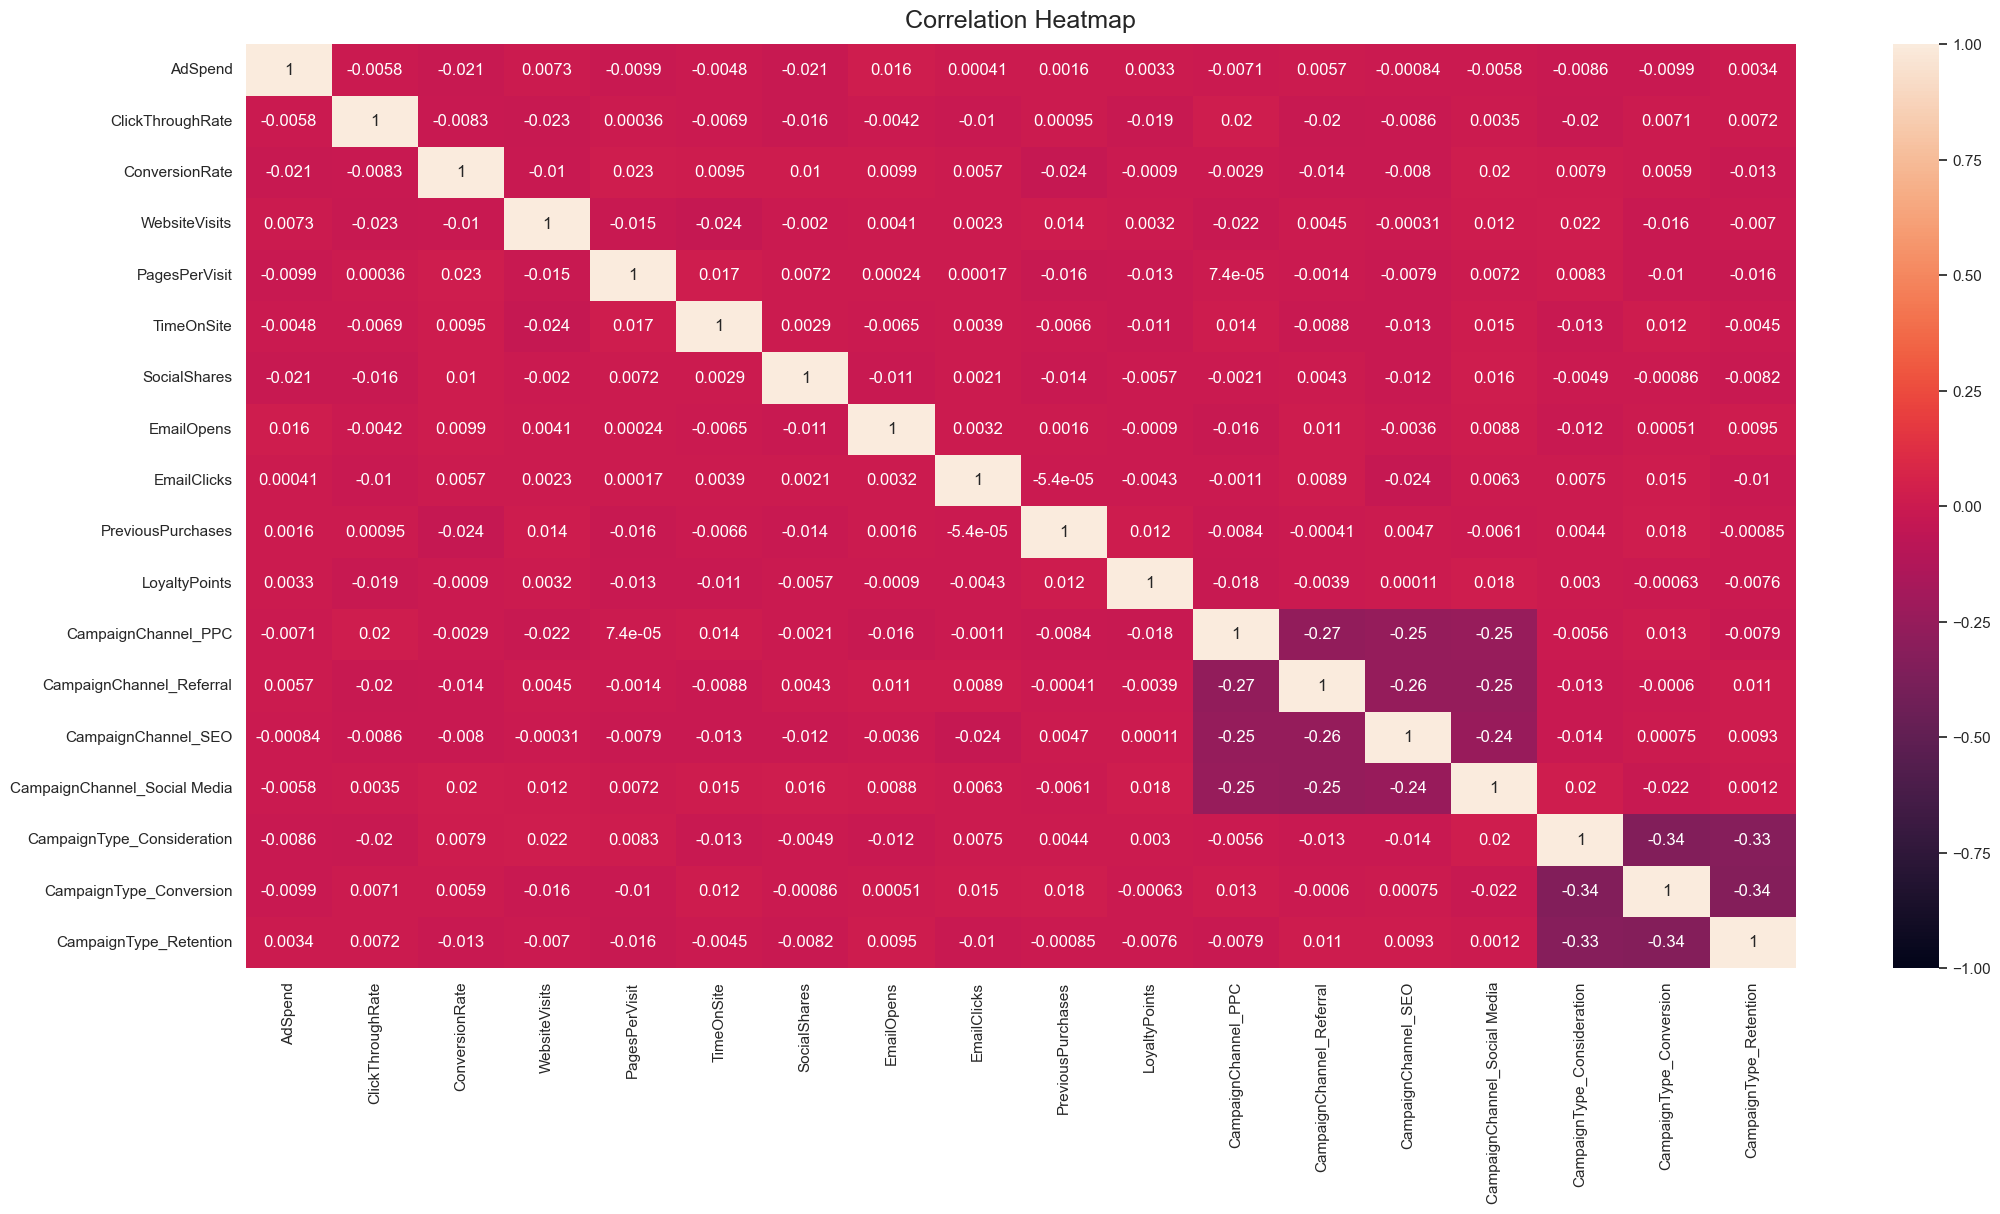

In [43]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# G. Train Test Split

In [45]:
#Balancing the Data
from imblearn.over_sampling import SMOTE

# 0.6 means class 0 will be 60% of class 1
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [47]:
x_test.shape

(2236, 18)

# H. Model Building

In [49]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 1. Logestic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [52]:
LR_pred = LR.predict(x_test)

In [53]:
# Classification Report
classification_rep = classification_report(y_test, LR_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       838
           1       0.86      0.90      0.88      1398

    accuracy                           0.85      2236
   macro avg       0.84      0.83      0.84      2236
weighted avg       0.85      0.85      0.85      2236



Confusion Matrix:


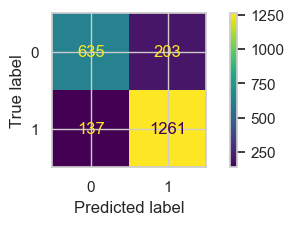

In [54]:
# Confusion Matrix
print('Confusion Matrix:')
ConfusionMatrixDisplay(confusion_matrix(y_test,LR_pred,labels=LR.classes_),display_labels=LR.classes_ ).plot()
plt.show()

## 2. Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth = 5)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [57]:
DT_pred = DT.predict(x_test)

In [58]:
# Classification Report
classification_rep = classification_report(y_test, DT_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       838
           1       0.82      0.80      0.81      1398

    accuracy                           0.76      2236
   macro avg       0.75      0.75      0.75      2236
weighted avg       0.76      0.76      0.76      2236



Confusion Matrix:


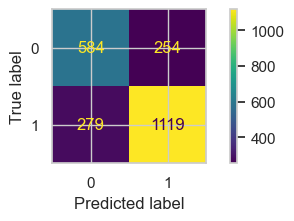

In [59]:
# Confusion Matrix
print('Confusion Matrix:')
ConfusionMatrixDisplay(confusion_matrix(y_test,DT_pred,labels=DT.classes_),display_labels=DT.classes_).plot()
plt.show()

## 3. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
RF = RandomForestClassifier(random_state=42,n_estimators= 100)
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [63]:
RF_pred = RF.predict(x_test)

In [64]:
# Classification Report
classification_rep = classification_report(y_test, RF_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       838
           1       0.89      0.97      0.93      1398

    accuracy                           0.91      2236
   macro avg       0.91      0.89      0.90      2236
weighted avg       0.91      0.91      0.91      2236



Confusion Matrix:


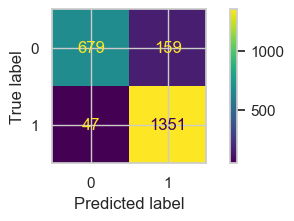

In [65]:
# Confusion Matrix
print('Confusion Matrix:')
ConfusionMatrixDisplay(confusion_matrix(y_test,RF_pred,labels=RF.classes_),display_labels=RF.classes_).plot()
plt.show()

## 4. SVM

In [67]:
from sklearn.svm import SVC
SVM = SVC(random_state=42)
SVM.fit(x_train,y_train)

SVC(random_state=42)

In [68]:
SVM_pred =  SVM.predict(x_test)

In [69]:
# Classification Report
classification_rep = classification_report(y_test, SVM_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       838
           1       0.87      0.94      0.90      1398

    accuracy                           0.88      2236
   macro avg       0.88      0.85      0.86      2236
weighted avg       0.88      0.88      0.87      2236



Confusion Matrix:


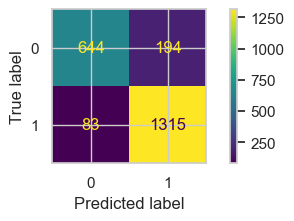

In [70]:
# Confusion Matrix
print('Confusion Matrix:')
ConfusionMatrixDisplay(confusion_matrix(y_test,SVM_pred,labels=SVM.classes_),display_labels=SVM.classes_).plot()
plt.show()

## 5.ADABoosting

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(random_state=42)
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
ADA.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [73]:
ADA_pred = ADA.predict(x_test)

In [74]:
# Classification Report
classification_rep = classification_report(y_test, ADA_pred,zero_division = 1)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       838
           1       0.87      0.89      0.88      1398

    accuracy                           0.85      2236
   macro avg       0.84      0.83      0.84      2236
weighted avg       0.85      0.85      0.85      2236



Confusion Matrix:


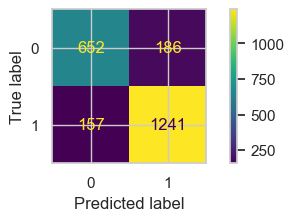

In [75]:
# Confusion Matrix
print('Confusion Matrix:')
ConfusionMatrixDisplay(confusion_matrix(y_test,ADA_pred,labels=ADA.classes_),display_labels=ADA.classes_).plot()
plt.show()

## 6. XGBoost

In [77]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
XGB_pred = XGB.predict(x_test)

In [79]:
# Classification Report
classification_rep = classification_report(y_test, XGB_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       838
           1       0.91      0.94      0.93      1398

    accuracy                           0.90      2236
   macro avg       0.90      0.89      0.90      2236
weighted avg       0.90      0.90      0.90      2236



Confusion Matrix:


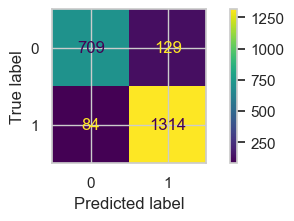

In [80]:
# Confusion Matrix
print('Confusion Matrix:')
ConfusionMatrixDisplay(confusion_matrix(y_test,XGB_pred,labels=XGB.classes_),display_labels=XGB.classes_).plot()
plt.show()

## 7. LightGBM

In [82]:
import lightgbm

In [83]:
LGB = lightgbm.LGBMClassifier(random_state=42, num_leaves=100)
LGB.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 5588, number of negative: 3353
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1746
[LightGBM] [Info] Number of data points in the train set: 8941, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624986 -> initscore=0.510766
[LightGBM] [Info] Start training from score 0.510766


LGBMClassifier(num_leaves=100, random_state=42)

In [84]:
LGB_pred = LGB.predict(x_test)

In [85]:
# Classification Report
classification_rep = classification_report(y_test, LGB_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       838
           1       0.91      0.95      0.93      1398

    accuracy                           0.91      2236
   macro avg       0.91      0.90      0.91      2236
weighted avg       0.91      0.91      0.91      2236



Confusion Matrix:


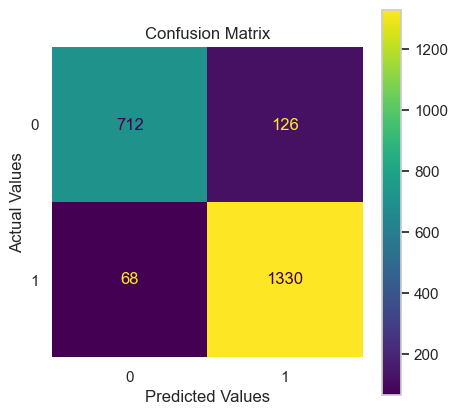

In [86]:
# Confusion Matrix
print('Confusion Matrix:')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, LGB_pred),
                              display_labels=LR.classes_)

fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, cmap='viridis', colorbar=True)

# Remove grid/lines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(False)  # disables the grid lines
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


# I. Model Comparision

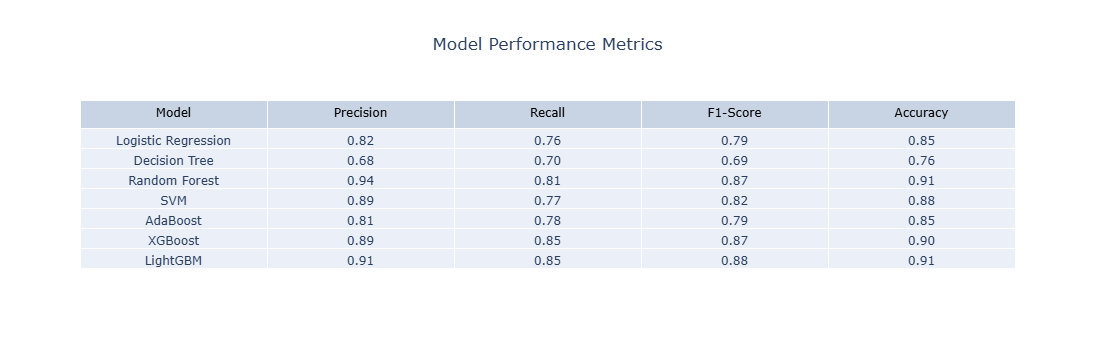

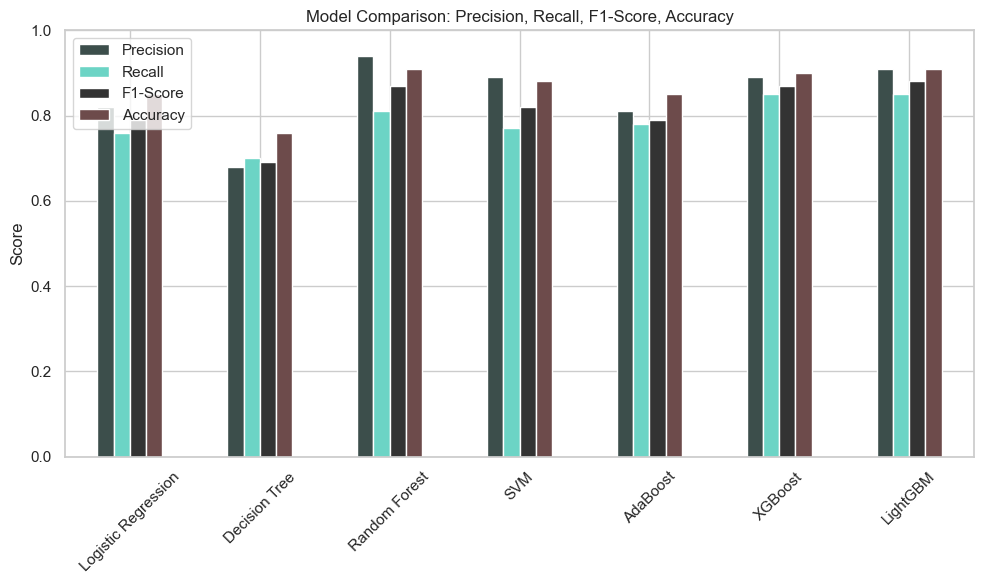

In [88]:
Random_Color_Palette()
# Dictionary of model names and their corresponding predictions
predictions = {
    'Logistic Regression': LR_pred,
    'Decision Tree': DT_pred,
    'Random Forest': RF_pred,
    'SVM': SVM_pred,
    'AdaBoost': ADA_pred,
    'XGBoost': XGB_pred,
    'LightGBM': LGB_pred
}

# Store results
results = {}

# Loop through predictions to generate metrics
for name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'Precision': report['0']['precision'],
        'Recall': report['0']['recall'],
        'F1-Score': report['0']['f1-score'],
        'Accuracy': accuracy
    }

# Convert to DataFrame
summary_df = pd.DataFrame(results).T  # Transpose for readability
summary_df = summary_df.round(2)

# Plotting
summary_df.plot(
    kind='bar',
    figsize=(10, 6),
    title='Model Comparison: Precision, Recall, F1-Score, Accuracy'
)

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=["Model"] + list(summary_df.columns),
                align='center',
                font=dict(size=12, color='black')),
    cells=dict(values=[summary_df.index] + [summary_df[col].tolist() for col in summary_df.columns],
               align='center',
               format=[""] + [".2f"]*4))
])

fig.update_layout(title="Model Performance Metrics", title_x=0.5)
fig.show()

plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# J. Feature Importance

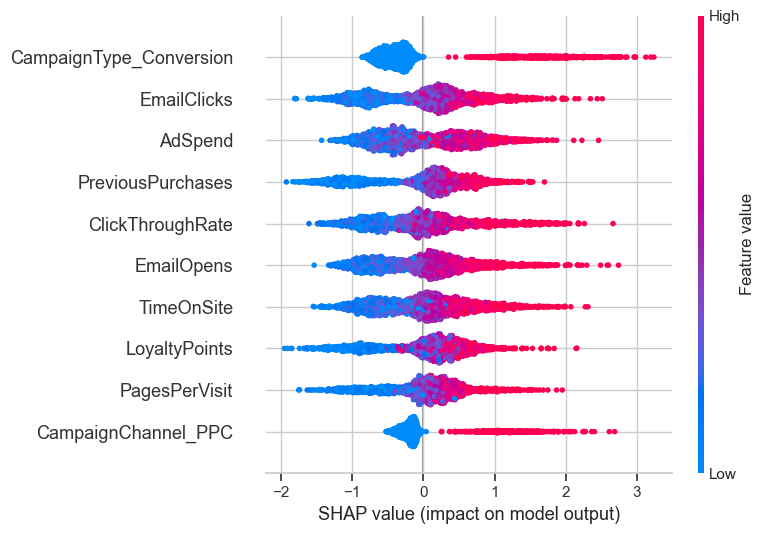

In [90]:
import shap
explainer= shap.TreeExplainer(LGB) 
x_test= pd.DataFrame(x_test, columns=X.columns)
shap_values = explainer.shap_values(x_test) 
shap.summary_plot(shap_values, x_test,max_display=10)

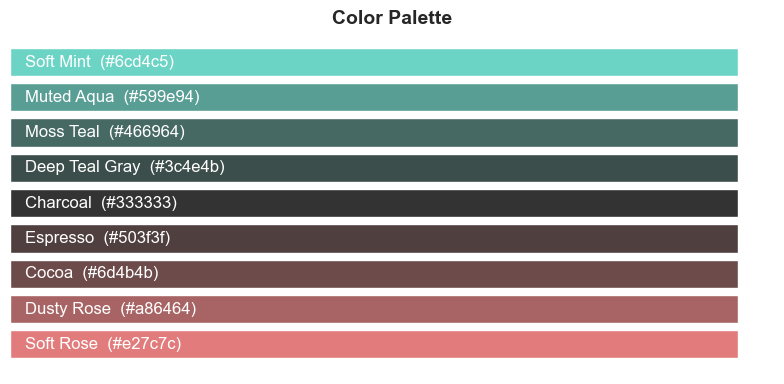

In [91]:

# Define the peachy warm color palette
colors = {
  "Soft Rose": "#e27c7c",       # Warm muted pink
    "Dusty Rose": "#a86464",      # Earthy rose tone
    "Cocoa": "#6d4b4b",           # Rich brown-pink
    "Espresso": "#503f3f",        # Deep earthy brown
    "Charcoal": "#333333",        # Dark neutral gray
    "Deep Teal Gray": "#3c4e4b",  # Cool dark teal-gray
    "Moss Teal": "#466964",       # Earthy teal
    "Muted Aqua": "#599e94",      # Dusty turquoise
    "Soft Mint": "#6cd4c5"        # Light fresh teal
}

# Set figure size
plt.figure(figsize=(8, 4))

# Plot each color as a horizontal bar
for i, (name, hex_code) in enumerate(colors.items()):
    plt.barh(i, 1, color=hex_code)
    plt.text(0.02, i, f"{name}  ({hex_code})", va='center', ha='left', fontsize=12,color='white')

# Aesthetics
plt.yticks([])
plt.xticks([])
plt.title("Color Palette", fontsize=14, fontweight='bold')
plt.box(False)
plt.tight_layout()
plt.show()


### 